NAME: Aakriti Singh

PRN: 20190802006

SUB: Data Science

Date: 29 Oct ‘21

Laboratory Experiment No. 4

AIM: Perform Feature Engineering on the “TITANIC” dataset shared

1. Handling of Missing Values

In [84]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd. pandas.set_option('display.max_columns', None)

In [85]:
dataset=pd.read_csv('Titanic_Dataset.csv')
print(dataset.shape)
dataset.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [86]:
## Let us capture all the nan values
## First lets handle Categorical features which are missing
features_nan=[feature for feature in dataset.columns if dataset[feature].isnull().sum()>1 
              and dataset[feature].dtypes=='O']

for feature in features_nan:
    print("{}: {}% missing values".format(feature,np.round(dataset[feature].isnull().mean(),4)))

Cabin: 0.771% missing values
Embarked: 0.0022% missing values


In [87]:
## Replace missing value with a new label
def replace_cat_feature(dataset,features_nan):
    data=dataset.copy()
    data[features_nan]=data[features_nan].fillna('Missing')
    return data

dataset=replace_cat_feature(dataset,features_nan)

dataset[features_nan].isnull().sum()

Cabin       0
Embarked    0
dtype: int64

In [88]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Missing,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Missing,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Missing,S


In [89]:
## Now lets check for numerical variables the contains missing values
numerical_with_nan=[feature for feature in dataset.columns if dataset[feature].isnull().sum()>1 
                    and dataset[feature].dtypes!='O']

## We will print the numerical nan variables and percentage of missing values

for feature in numerical_with_nan:
    print("{}: {}% missing value".format(feature,np.around(dataset[feature].isnull().mean(),4)))

Age: 0.1987% missing value


In [90]:
## Replacing the numerical Missing Values

for feature in numerical_with_nan:
    ## We will replace by using median since there are outliers
    median_value=dataset[feature].median()
    
    ## create a new feature to capture nan values
    dataset[feature+'nan']=np.where(dataset[feature].isnull(),1,0)
    dataset[feature].fillna(median_value,inplace=True)
    
dataset[numerical_with_nan].isnull().sum()

Age    0
dtype: int64

In [91]:
dataset.head(50)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Agenan
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Missing,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Missing,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Missing,S,0
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,Missing,Q,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,Missing,S,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,Missing,S,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,Missing,C,0


Here we have succefully cleaned the data and filled the missing values with the required
parameters.

2. Handling The Outliers

In [92]:
max_thresold = dataset['Age'].quantile(0.95)
max_thresold

54.0

In [93]:
dataset[dataset['Age']>max_thresold]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Agenan
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,0
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,Missing,S,0
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,Missing,S,0
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C,0
94,95,0,3,"Coxon, Mr. Daniel",male,59.0,0,0,364500,7.2500,Missing,S,0
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C,0
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,Missing,Q,0
152,153,0,3,"Meo, Mr. Alfonzo",male,55.5,0,0,A.5. 11206,8.0500,Missing,S,0
170,171,0,1,"Van der hoef, Mr. Wyckoff",male,61.0,0,0,111240,33.5000,B19,S,0
174,175,0,1,"Smith, Mr. James Clinch",male,56.0,0,0,17764,30.6958,A7,C,0


In [94]:
min_thresold = dataset['Age'].quantile(0.05)
min_thresold

6.0

In [95]:
dataset[dataset['Age']<min_thresold]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Agenan
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,Missing,S,0
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.00,1,1,PP 9549,16.7000,G6,S,0
16,17,0,3,"Rice, Master. Eugene",male,2.00,4,1,382652,29.1250,Missing,Q,0
43,44,1,2,"Laroche, Miss. Simonne Marie Anne Andree",female,3.00,1,2,SC/Paris 2123,41.5792,Missing,C,0
58,59,1,2,"West, Miss. Constance Mirium",female,5.00,1,2,C.A. 34651,27.7500,Missing,S,0
63,64,0,3,"Skoog, Master. Harald",male,4.00,3,2,347088,27.9000,Missing,S,0
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,Missing,S,0
119,120,0,3,"Andersson, Miss. Ellis Anna Maria",female,2.00,4,2,347082,31.2750,Missing,S,0
164,165,0,3,"Panula, Master. Eino Viljami",male,1.00,4,1,3101295,39.6875,Missing,S,0
171,172,0,3,"Rice, Master. Arthur",male,4.00,4,1,382652,29.1250,Missing,Q,0


In [96]:
dataset[(dataset['Age']<max_thresold) & (dataset['Age']>min_thresold)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Agenan
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Missing,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Missing,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Missing,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,Missing,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,Missing,S,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0


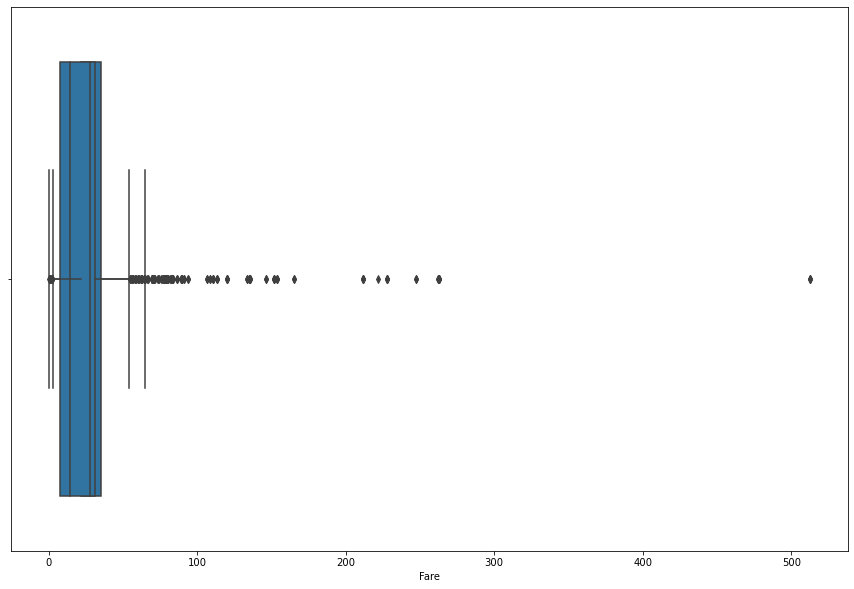

In [97]:
num_fig = dataset.select_dtypes(include=['float64'])
plt.figure(figsize = (15,10), facecolor='white')
for column in num_fig:
    sns.boxplot(x=dataset[column])
plt.show()

We can identify the outliers by considering the Min and Max values of the range for Age
and Fare respectively and we are able to recognize the Outliers by finding the values
below Min value and above max value respectively

In [98]:
#Handling rare type of categorical variables

In [99]:
categorical_features=[feature for feature in dataset.columns if dataset[feature].dtype=='O']

In [100]:
categorical_features

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

In [101]:
for feature in categorical_features:
    temp=dataset.groupby(feature)['Fare'].count()/len(dataset)
    temp_df=temp[temp>0.001].index
    dataset[feature]=np.where(dataset[feature].isin(temp_df),dataset[feature],'Rare_var')

In [102]:
dataset.head(50)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Agenan
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Missing,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Missing,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Missing,S,0
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,Missing,Q,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,Missing,S,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,Missing,S,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,Missing,C,0


In [103]:
for feature in categorical_features:
    labels_ordered=dataset.groupby([feature])['Fare'].mean().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    dataset[feature]=dataset[feature].map(labels_ordered)

In [104]:
dataset.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Agenan
0,1,0,3,74,0,22.0,1,0,66,7.2500,14,1,0
1,2,1,1,788,1,38.0,1,0,636,71.2833,90,2,0
2,3,1,3,223,1,26.0,0,0,235,7.9250,14,1,0
3,4,1,1,749,1,35.0,1,0,617,53.1000,75,1,0
4,5,0,3,245,0,35.0,0,0,250,8.0500,14,1,0
5,6,0,3,292,0,28.0,0,0,287,8.4583,14,0,1
6,7,0,1,734,0,54.0,0,0,609,51.8625,66,1,0
7,8,0,3,530,0,2.0,3,1,480,21.0750,14,1,0
8,9,1,3,364,1,27.0,0,2,356,11.1333,14,1,0
9,10,1,2,657,1,14.0,1,0,564,30.0708,14,2,0


In [105]:
scaling_feature=[feature for feature in dataset.columns if feature not in ['PassengerId','Embarked'] ]
len(scaling_feature)

11

In [106]:
scaling_feature

['Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Agenan']

In [107]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Agenan
0,1,0,3,74,0,22.0,1,0,66,7.2500,14,1,0
1,2,1,1,788,1,38.0,1,0,636,71.2833,90,2,0
2,3,1,3,223,1,26.0,0,0,235,7.9250,14,1,0
3,4,1,1,749,1,35.0,1,0,617,53.1000,75,1,0
4,5,0,3,245,0,35.0,0,0,250,8.0500,14,1,0


CONCLUSION : 
    
Hence we have successfully implemented the feature engineering on the given dataset. We have cleaned the data, observed the outliers and also the rare variables. We have
also applied the necessary steps required for the Feature Engineering and also for the Exploratory Data Analysis